<a href="https://colab.research.google.com/github/marioruizgonzalez/ml-medium-exercises/blob/main/ClassificationWithNeuronalNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain,ytrain), (xtest,ytest )= fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Image Label : 5


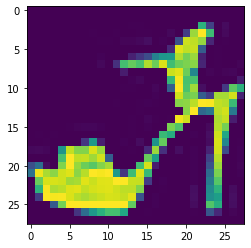

In [6]:
imgIndex = 9 
image = xtrain[imgIndex]
print("Image Label :", ytrain[imgIndex])
plt.imshow(image)

In [7]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30,
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7117 - accuracy: 0.7656 - val_loss: 0.4999 - val_accuracy: 0.8320
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4900 - accuracy: 0.8285 - val_loss: 0.4579 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4450 - accuracy: 0.8441 - val_loss: 0.4435 - val_accuracy: 0.8452
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4163 - accuracy: 0.8553 - val_loss: 0.4087 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3948 - accuracy: 0.8616 - val_loss: 0.3786 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3777 - accuracy: 0.8681 - val_loss: 0.3619 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3630 - accuracy: 0.8720 - val_loss: 0.3701 - val_accuracy:

In [12]:
new = xtest[:1]

In [13]:
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 84ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [14]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9]
